In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/videogames/vgsales.csv


## The dataset that will be analyzed below is a dataset containing data of videogame sales over the period of 1980 to 2020. It has information regarding the Publisher, Genre of videogame, platform etc. The dataset also contains information about regional sales of videogames in the regions like North America, Europe, Japan as well as Global


#### The dataset is a CSV file and it can be read into Pandas dataframe using the function pd.read_csv()

In [4]:
vgames = pd.read_csv("/kaggle/input/videogames/vgsales.csv")

#### The data loaded into the dataframe will be verified using the function - 'head()'

In [5]:
vgames.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


#### Number of columns, their datatypes, counts of each column will be displayed using the function - 'info()'

In [6]:
vgames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### It could be seen that there are a total of 16598 entries in the dataset. And there are 271 missing entries in the 'Year' column and 58 missing entries in 'Publisher' column
#### One way to remove the missing values is deleting the entire column from the dataset where there are missing values and other is replacing Null with appropriate values

#### Since 'Year' is a numerical data, we would be able to find the mean year from the dataset and replace the missing values with mean_year
#### Since 'Publisher' is a non-numerical data, we will not be able to perform aggragate calculation on the data. Hence, we will delete the rows with missing values, since only 58 rows are missing with 'Publisher' values out of 16598 rows of data, which wouldn't affect our analysis to a greater stretch

In [7]:
mean_year = vgames['Year'].mean()
meanyear = round(mean_year)
meanyear

2006

In [8]:
vgames['Year'].fillna(meanyear, inplace = True)
vgames.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [9]:
vgames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [10]:
vgames.dropna(subset=['Publisher'], inplace = True)
vgames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16540 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16540 non-null  int64  
 1   Name          16540 non-null  object 
 2   Platform      16540 non-null  object 
 3   Year          16540 non-null  float64
 4   Genre         16540 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16540 non-null  float64
 7   EU_Sales      16540 non-null  float64
 8   JP_Sales      16540 non-null  float64
 9   Other_Sales   16540 non-null  float64
 10  Global_Sales  16540 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


#### We have replaced the 'Year' column with mean year and dropped the rows with missing 'Publisher' values using 'dropna' function
#### Now, it could be seen that the column 'Year' is of datatype - 'object'. Hence it has to be converted into 'datetime' datatype

In [11]:
vgames['Year'] = pd.to_datetime(vgames['Year'], format = '%Y')
vgames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16540 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Rank          16540 non-null  int64         
 1   Name          16540 non-null  object        
 2   Platform      16540 non-null  object        
 3   Year          16540 non-null  datetime64[ns]
 4   Genre         16540 non-null  object        
 5   Publisher     16540 non-null  object        
 6   NA_Sales      16540 non-null  float64       
 7   EU_Sales      16540 non-null  float64       
 8   JP_Sales      16540 non-null  float64       
 9   Other_Sales   16540 non-null  float64       
 10  Global_Sales  16540 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 1.5+ MB


In [12]:
vgames.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


#### After convering the 'Year' column from object to date, it could be seen that the data has been displayed in yyyy-mm-dd format. This is because od pf.to_datetime(). To extract only the year, we could use 'dt.year' to desired column

In [13]:
vgames['Year'] = vgames['Year'].dt.year
vgames.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [14]:
vgames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16540 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16540 non-null  int64  
 1   Name          16540 non-null  object 
 2   Platform      16540 non-null  object 
 3   Year          16540 non-null  int64  
 4   Genre         16540 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16540 non-null  float64
 7   EU_Sales      16540 non-null  float64
 8   JP_Sales      16540 non-null  float64
 9   Other_Sales   16540 non-null  float64
 10  Global_Sales  16540 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [15]:
vgames.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


#### But 'Year' column with integer type wouldn't be useful for further analysis. We will convert the data in 'Year'column to datetime once again and let the data stay in yyyy-mm-dd format. While analysing, we will extract only the year if required

In [16]:
vgames['Year'] = pd.to_datetime(vgames['Year'], format = '%Y')
vgames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16540 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Rank          16540 non-null  int64         
 1   Name          16540 non-null  object        
 2   Platform      16540 non-null  object        
 3   Year          16540 non-null  datetime64[ns]
 4   Genre         16540 non-null  object        
 5   Publisher     16540 non-null  object        
 6   NA_Sales      16540 non-null  float64       
 7   EU_Sales      16540 non-null  float64       
 8   JP_Sales      16540 non-null  float64       
 9   Other_Sales   16540 non-null  float64       
 10  Global_Sales  16540 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 1.5+ MB


In [17]:
vgames.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


#### To get the aggregate data of the numerical columns, we can use the 'describe()' function to know if there are any outliers among other things

In [18]:
vgames.describe()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16540.000000,16540.000000,16540.000000,16540.000000,16540.000000,16540.000000
mean,8294.197642,0.265079,0.146883,0.077998,0.048191,0.538426
std,4790.703200,0.817929,0.506129,0.309800,0.188879,1.557424
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4143.750000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.500000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12440.250000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [19]:
vgames

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002-01-01,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003-01-01,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008-01-01,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010-01-01,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


### Since, the data has been cleaned and there are no missing values and no outliers, we can get started with our analysis of the data

In [36]:
platfrm = vgames['Platform'].value_counts().nlargest(10)
platfrm

PS2     2159
DS      2156
PS3     1326
Wii     1324
X360    1261
PSP     1211
PS      1193
PC       954
XB       824
GBA      796
Name: Platform, dtype: int64

In [37]:
type(platfrm)

pandas.core.series.Series

In [38]:
platform = pd.DataFrame({'Platform':platfrm.index,'Count': platfrm})
platform = platform.set_index('Platform', drop=True)
platform

,Count
Platform,
PS2,2159
DS,2156
PS3,1326
Wii,1324
X360,1261
PSP,1211
PS,1193
PC,954
XB,824


In [21]:
vgames['Name'].nunique()

11442

In [39]:
gen = vgames['Genre'].value_counts()
gen

Action          3309
Sports          2343
Misc            1712
Role-Playing    1486
Shooter         1308
Adventure       1282
Racing          1248
Platform         884
Simulation       863
Fighting         846
Strategy         678
Puzzle           581
Name: Genre, dtype: int64

In [40]:
Genre = pd.DataFrame({'Genre':gen.index,'Count': gen})
Genre = Genre.set_index('Genre', drop=True)
Genre

,Count
Genre,
Action,3309
Sports,2343
Misc,1712
Role-Playing,1486
Shooter,1308
Adventure,1282
Racing,1248
Platform,884
Simulation,863


In [23]:
vgames['Publisher'].nunique()

578

In [29]:
publish = vgames['Publisher'].value_counts().nlargest(10)
type(publish)

pandas.core.series.Series

In [35]:
publisher = pd.DataFrame({'Publisher':publish.index,'Count': publish})
publisher = publisher.set_index('Publisher', drop=True)
publisher

,Count
Publisher,
Electronic Arts,1351
Activision,975
Namco Bandai Games,932
Ubisoft,921
Konami Digital Entertainment,832
THQ,715
Nintendo,703
Sony Computer Entertainment,683
Sega,639


In [41]:
vgames

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002-01-01,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003-01-01,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008-01-01,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010-01-01,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


## 1. Which videogames under which platform are making the highest sales overall

In [46]:
sales_cols = ['NA_Sales','EU_Sales','JP_Sales','Global_Sales']
Platform_sales = vgames.groupby('Platform')[sales_cols].sum()
Platform_sales = Platform_sales.sort_values(by='Global_Sales', ascending=False)
Platform_sales

,NA_Sales,EU_Sales,JP_Sales,Global_Sales
Platform,,,,
PS2,582.17,338.19,139.20,1252.43
X360,601.04,280.54,12.42,979.89
PS3,392.26,343.23,79.92,957.29
Wii,507.56,268.33,69.21,926.36
DS,390.67,194.63,175.34,822.19
PS,335.65,213.02,139.78,729.07
GBA,181.85,73.15,47.06,310.29
PSP,108.93,68.25,76.67,296.10
PS4,96.80,123.70,14.30,278.10


##### From the above dataset, it is evident that the platforms like - PS2, X360, PS3, Wii, DS, PS are contributing the most in the global sales 
##### While platforms like SCD, NG, WS, WS, TG16, 3DO, GG, PCFX are failing to mark their market in the sales

In [50]:
top10_platforms = Platform_sales.head(10)
top10_platforms

,NA_Sales,EU_Sales,JP_Sales,Global_Sales
Platform,,,,
PS2,582.17,338.19,139.20,1252.43
X360,601.04,280.54,12.42,979.89
PS3,392.26,343.23,79.92,957.29
Wii,507.56,268.33,69.21,926.36
DS,390.67,194.63,175.34,822.19
PS,335.65,213.02,139.78,729.07
GBA,181.85,73.15,47.06,310.29
PSP,108.93,68.25,76.67,296.10
PS4,96.80,123.70,14.30,278.10


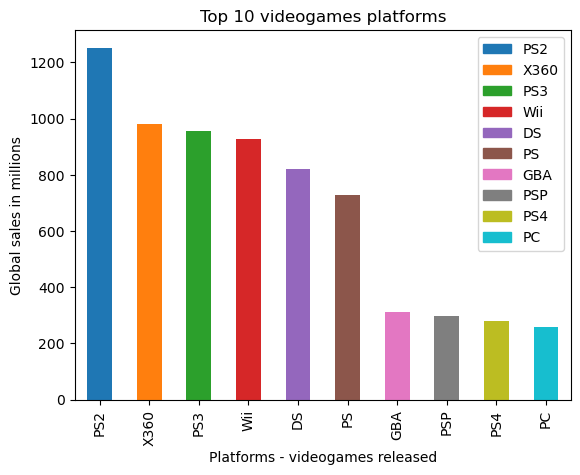

In [67]:
import matplotlib.pyplot as plt
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
top10_platforms.plot(kind='bar',y='Global_Sales',color = colors, legend=False)
plt.ylabel('Global sales in millions')
plt.xlabel('Platforms - videogames released')
plt.title('Top 10 videogames platforms')
handles = [plt.Rectangle((0,0),1,1, color=colors[i]) for i in range(len(top10_platforms))]
plt.legend(handles,top10_platforms.index,loc='best')
plt.show()

## 2. What genre's videogames are most likable by the audience which is resulting in higher sales

In [68]:
sales_cols = ['NA_Sales','EU_Sales','JP_Sales','Global_Sales']
Genre_sales = vgames.groupby('Genre')[sales_cols].sum()
Genre_sales = Genre_sales.sort_values(by='Global_Sales', ascending=False)
Genre_sales

,NA_Sales,EU_Sales,JP_Sales,Global_Sales
Genre,,,,
Action,877.54,524.92,159.49,1750.33
Sports,682.54,376.30,135.25,1329.35
Shooter,582.59,313.24,38.28,1037.32
Role-Playing,327.28,188.05,352.26,927.31
Platform,447.05,201.13,130.77,830.87
Misc,404.67,213.93,107.72,802.15
Racing,359.42,238.38,56.69,732.03
Fighting,221.92,100.22,87.35,445.70
Simulation,183.31,113.20,63.64,391.96


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


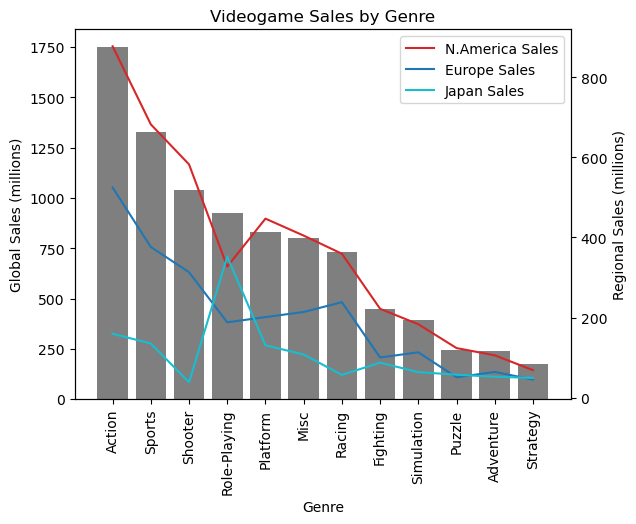

In [76]:
fig, ax1 = plt.subplots()

# Bar graph for global sales
ax1.bar(Genre_sales.index, Genre_sales['Global_Sales'], color='tab:grey')
ax1.set_xlabel('Genre')
ax1.set_ylabel('Global Sales (millions)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Line graphs for regional sales
ax2 = ax1.twinx()
ax2.plot(Genre_sales.index, Genre_sales['NA_Sales'], color='tab:red', label='N.America Sales')
ax2.plot(Genre_sales.index, Genre_sales['EU_Sales'], color='tab:blue', label='Europe Sales')
ax2.plot(Genre_sales.index, Genre_sales['JP_Sales'], color='tab:cyan', label='Japan Sales')
ax2.set_ylabel('Regional Sales (millions)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

ax1.set_xticklabels(Genre_sales.index, rotation=90)

# Add a legend to the chart
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

plt.title('Videogame Sales by Genre')
plt.show()

##### From the above graph, it could be seen that the videogames of genres - Action, Sports, Shooter are popular among audiences globally while genres like Puzzle, Adventure, Strategy are to be modified or upgraded to be likable by audience
##### Overall the videogames are sold most in North America region and least in Japan region

## 3. Who (Publishers) are selling most videogames and making better profits globally and regionally?

In [81]:
sales_cols = ['NA_Sales','EU_Sales','JP_Sales','Global_Sales']
Pub_sales = vgames.groupby('Publisher')[sales_cols].sum()
Pub_sales = Pub_sales.sort_values(by='Global_Sales', ascending=False)
top10_publishers = Pub_sales.head(10)
top10_publishers

,NA_Sales,EU_Sales,JP_Sales,Global_Sales
Publisher,,,,
Nintendo,816.87,418.74,455.42,1786.56
Electronic Arts,595.07,371.27,14.04,1110.32
Activision,429.70,215.53,6.54,727.46
Sony Computer Entertainment,265.22,187.72,74.10,607.50
Ubisoft,253.43,163.32,7.50,474.72
Take-Two Interactive,220.49,118.14,5.83,399.54
THQ,208.77,94.73,5.01,340.77
Konami Digital Entertainment,92.16,69.69,91.30,283.64
Sega,109.40,82.00,57.03,272.99


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator


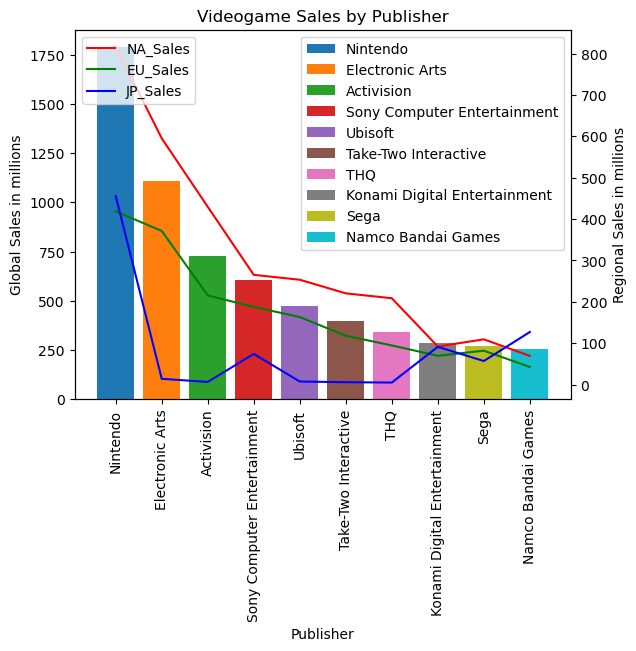

In [89]:
bar_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
              '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
line_colors = ['r', 'g', 'b']

# Create a plot with a bar graph for global sales and line graphs for regional sales
fig, ax1 = plt.subplots()

# Bar graph for global sales
for i, publisher in enumerate(top10_publishers.index):
    ax1.bar(publisher, top10_publishers.loc[publisher]['Global_Sales'], 
            color=bar_colors[i], label=publisher)
ax1.set_xlabel('Publisher')
ax1.set_ylabel('Global Sales in millions', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Line graphs for regional sales
ax2 = ax1.twinx()
for i, col in enumerate(['NA_Sales', 'EU_Sales', 'JP_Sales']):
    ax2.plot(top10_publishers.index, top10_publishers[col], 
             color=line_colors[i], label=col)
ax2.set_ylabel('Regional Sales in millions')
ax1.set_xticklabels(top10_publishers.index, rotation=90)
# Add separate legends for the bar and line graphs
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1, labels1, loc='upper right')
ax2.legend(lines2, labels2, loc='upper left')

plt.title('Videogame Sales by Publisher')
plt.show()

##### Nintendo is the leading publisher among the lot with overall global sales of above 1750 followed by Electronic arts and Activision while THQ, Konami, Sega, Namco Bandai Games are on the lower side of sales
##### North America is the leading market among three regions for sales of videogames

## 4. In which year were the sales highest and lowest

In [92]:
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']
yearly_sales = vgames.groupby('Year')[sales_cols].sum().sort_values(by='Global_Sales', ascending=False)
yearly_sales

,NA_Sales,EU_Sales,JP_Sales,Global_Sales
Year,,,,
2008-01-01,351.44,184.40,60.26,678.90
2009-01-01,338.85,191.59,61.89,667.30
2006-01-01,319.88,152.00,79.55,614.63
2007-01-01,311.18,160.18,60.29,609.92
2010-01-01,304.24,176.57,59.49,600.29
2011-01-01,241.00,167.31,53.04,515.80
2005-01-01,241.58,121.56,54.28,458.51
2004-01-01,218.80,105.92,41.65,414.01
2002-01-01,216.19,109.74,41.76,395.52


#### The highest sales happened in the year - 2008
##### But if we look at the data, the sales were higher over the years - 2006 to 2011